# Model for Hand Landmarks

### Library Imports and Data Loading

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

In [29]:
df = pd.read_csv("data/landmark_locations.csv")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1979 entries, 0 to 1978
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   WRIST_X              1979 non-null   object
 1   WRIST_Y              1979 non-null   object
 2   Letter               1979 non-null   object
 3   THUMB_CMC_X          1979 non-null   object
 4   THUMB_CMC_Y          1979 non-null   object
 5   THUMB_MCP_X          1979 non-null   object
 6   THUMB_MCP_Y          1979 non-null   object
 7   THUMB_IP_X           1979 non-null   object
 8   THUMB_IP_Y           1979 non-null   object
 9   THUMB_TIP_X          1979 non-null   object
 10  THUMB_TIP_Y          1979 non-null   object
 11  INDEX_FINGER_MCP_X   1979 non-null   object
 12  INDEX_FINGER_MCP_Y   1979 non-null   object
 13  INDEX_FINGER_PIP_X   1979 non-null   object
 14  INDEX_FINGER_PIP_Y   1979 non-null   object
 15  INDEX_FINGER_DIP_X   1979 non-null   object
 16  INDEX_

In [31]:
df['Letter'].unique()

array(['a', 'Letter', 'b', 'd', 'e', 'f', 'h', 'i', 'k', 'l', 'm', 'n',
       'p', 'q', 't', 'u', 'v', 'w', 'y'], dtype=object)

In [32]:
df.head()

,WRIST_X,WRIST_Y,Letter,THUMB_CMC_X,THUMB_CMC_Y,THUMB_MCP_X,THUMB_MCP_Y,THUMB_IP_X,THUMB_IP_Y,THUMB_TIP_X,...,RING_FINGER_TIP_X,RING_FINGER_TIP_Y,PINKY_MCP_X,PINKY_MCP_Y,PINKY_PIP_X,PINKY_PIP_Y,PINKY_DIP_X,PINKY_DIP_Y,PINKY_TIP_X,PINKY_TIP_Y
0,0.5497406125068665,0.8063137531280518,a,0.47887006402015686,0.7302677035331726,0.44389739632606506,0.5623695850372314,0.4354613721370697,0.42600417137145996,0.4287225306034088,...,0.5442141890525818,0.4964906871318817,0.609634280204773,0.48092004656791687,0.6071943044662476,0.3702794909477234,0.5862573385238647,0.42469894886016846,0.5787050127983093,0.49044451117515564
1,0.5509025454521179,0.8079383373260498,a,0.4802524447441101,0.7318907976150513,0.4446772336959839,0.5633175373077393,0.43659499287605286,0.4285568594932556,0.42814743518829346,...,0.5439226627349854,0.4965909421443939,0.6104769110679626,0.4786275029182434,0.6079843640327454,0.36815375089645386,0.5870113968849182,0.42351779341697693,0.5791953206062317,0.4896303713321686
2,0.5469197630882263,0.8008928894996643,a,0.4748833179473877,0.7247403860092163,0.43979954719543457,0.5600353479385376,0.43098488450050354,0.42470890283584595,0.4195494055747986,...,0.5411350727081299,0.4940066337585449,0.6068817377090454,0.47659075260162354,0.6055232286453247,0.36604106426239014,0.5837326049804688,0.4225333333015442,0.5741127729415894,0.489112913608551
3,0.5464624166488647,0.8012657165527344,a,0.47519680857658386,0.7319940328598022,0.43888503313064575,0.555374026298523,0.43403175473213196,0.4116598963737488,0.427521675825119,...,0.5399672389030457,0.49428701400756836,0.6075102090835571,0.4704730212688446,0.6052590608596802,0.35766440629959106,0.5835824012756348,0.41701531410217285,0.5749450922012329,0.4844367504119873
4,0.5445728302001953,0.8162528276443481,a,0.47220104932785034,0.743609607219696,0.4347219169139862,0.5665507912635803,0.42574799060821533,0.4239126443862915,0.4160862863063812,...,0.538123607635498,0.49890971183776855,0.6076304912567139,0.4771903455257416,0.606137752532959,0.3608226180076599,0.5843127369880676,0.4194769263267517,0.5760313272476196,0.48779499530792236


In [33]:
df.columns

Index(['WRIST_X', 'WRIST_Y', 'Letter', 'THUMB_CMC_X', 'THUMB_CMC_Y',
       'THUMB_MCP_X', 'THUMB_MCP_Y', 'THUMB_IP_X', 'THUMB_IP_Y', 'THUMB_TIP_X',
       'THUMB_TIP_Y', 'INDEX_FINGER_MCP_X', 'INDEX_FINGER_MCP_Y',
       'INDEX_FINGER_PIP_X', 'INDEX_FINGER_PIP_Y', 'INDEX_FINGER_DIP_X',
       'INDEX_FINGER_DIP_Y', 'INDEX_FINGER_TIP_X', 'INDEX_FINGER_TIP_Y',
       'MIDDLE_FINGER_MCP_X', 'MIDDLE_FINGER_MCP_Y', 'MIDDLE_FINGER_PIP_X',
       'MIDDLE_FINGER_PIP_Y', 'MIDDLE_FINGER_DIP_X', 'MIDDLE_FINGER_DIP_Y',
       'MIDDLE_FINGER_TIP_X', 'MIDDLE_FINGER_TIP_Y', 'RING_FINGER_MCP_X',
       'RING_FINGER_MCP_Y', 'RING_FINGER_PIP_X', 'RING_FINGER_PIP_Y',
       'RING_FINGER_DIP_X', 'RING_FINGER_DIP_Y', 'RING_FINGER_TIP_X',
       'RING_FINGER_TIP_Y', 'PINKY_MCP_X', 'PINKY_MCP_Y', 'PINKY_PIP_X',
       'PINKY_PIP_Y', 'PINKY_DIP_X', 'PINKY_DIP_Y', 'PINKY_TIP_X',
       'PINKY_TIP_Y'],
      dtype='object')

### Extract Data

In [36]:
# Extract Data
features = ['WRIST_X', 'WRIST_Y', 'THUMB_CMC_X', 'THUMB_CMC_Y', 'THUMB_MCP_X', 'THUMB_MCP_Y', 'THUMB_IP_X', 'THUMB_IP_Y', 'THUMB_TIP_X',
       'THUMB_TIP_Y', 'INDEX_FINGER_MCP_X', 'INDEX_FINGER_MCP_Y', 'INDEX_FINGER_PIP_X', 'INDEX_FINGER_PIP_Y', 'INDEX_FINGER_DIP_X', 'INDEX_FINGER_DIP_Y', 
       'INDEX_FINGER_TIP_X', 'INDEX_FINGER_TIP_Y', 'MIDDLE_FINGER_MCP_X', 'MIDDLE_FINGER_MCP_Y', 'MIDDLE_FINGER_PIP_X', 'MIDDLE_FINGER_PIP_Y', 
       'MIDDLE_FINGER_DIP_X', 'MIDDLE_FINGER_DIP_Y', 'MIDDLE_FINGER_TIP_X', 'MIDDLE_FINGER_TIP_Y', 'RING_FINGER_MCP_X', 'RING_FINGER_MCP_Y', 
       'RING_FINGER_PIP_X', 'RING_FINGER_PIP_Y', 'RING_FINGER_DIP_X', 'RING_FINGER_DIP_Y', 'RING_FINGER_TIP_X', 'RING_FINGER_TIP_Y', 'PINKY_MCP_X', 
       'PINKY_MCP_Y', 'PINKY_PIP_X', 'PINKY_PIP_Y', 'PINKY_DIP_X', 'PINKY_DIP_Y', 'PINKY_TIP_X', 'PINKY_TIP_Y']
X = df[features]
y = df["Letter"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

No need to scale data because they're already scaled on range 0-1.

### Hyperparameter Tuning

Selecting K with 5-fold cross validation.

In [37]:
# Defining a range of k values to test
k_values = list(range(1, 25, 2))

# Initialize a list for cross-validation scores
cv_scores = []

# Perform 5-fold cross-validation
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")

    print(k, scores)
    # Average all 5 scores
    cv_scores.append(scores.mean())

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sierrashaw/Desktop/school/AT CS/ASL_Recognizer/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sierrashaw/Desktop/school/AT CS/ASL_Recognizer/.venv/lib/python3.9/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/sierrashaw/Desktop/school/AT CS/ASL_Recognizer/.venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 238, in fit
    return self._fit(X, y)
  File "/Users/sierrashaw/Desktop/school/AT CS/ASL_Recognizer/.venv/lib/python3.9/site-packages/sklearn/neighbors/_base.py", line 476, in _fit
    X, y = self._validate_data(
  File "/Users/sierrashaw/Desktop/school/AT CS/ASL_Recognizer/.venv/lib/python3.9/site-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/sierrashaw/Desktop/school/AT CS/ASL_Recognizer/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py", line 1263, in check_X_y
    X = check_array(
  File "/Users/sierrashaw/Desktop/school/AT CS/ASL_Recognizer/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/Users/sierrashaw/Desktop/school/AT CS/ASL_Recognizer/.venv/lib/python3.9/site-packages/sklearn/utils/_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/Users/sierrashaw/Desktop/school/AT CS/ASL_Recognizer/.venv/lib/python3.9/site-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'WRIST_X'


KeyError: 'y'

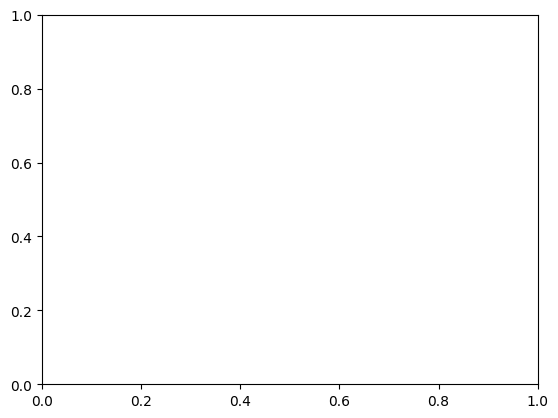

In [38]:
# Plot our Cross Validation Results
sns.lineplot(x=k_values, y=cv_scores, marker='o')
plt.title('Accuracy vs. K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)